In [129]:
# importing the dependencies
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
from darkflow.net.build import TFNet
# the cfg file and weights location
model = {"model": "cfg/yolov2.cfg", 
           "load": "yolov2.weights", 
           "threshold": 0.4}

tfnet = TFNet(model) # creating the object

imgcv = cv2.imread("./sample_img/sample_dog.jpg",cv2.IMREAD_COLOR) # read the image 
result = tfnet.return_predict(imgcv) # predict the classes and cordinates of the oject
print(result)

Parsing ./cfg/yolov2.cfg
Parsing cfg/yolov2.cfg
Loading yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.18648195266723633s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 7

In [131]:

#plt.imshow(imgcv) # image before detection
#print(imgcv.shape) # shape of the image

In [145]:


# This is for draw the bounding box around the predicted classes 
tl = []
br = []
labels = []
confidence = []
cf_cor = []

for i in range(len(result)):
    topleft = (result[i]['topleft']['x'],result[i]['topleft']['y']) # to get the topleft cordinates in a tuple
    bottomright = (result[i]['bottomright']['x'],result[i]['bottomright']['y']) # to get the bottomright cordinates in a tuple
    label = (result[i]['label']) # to get the labels from the predicted class ,it's in the form of dictionary
    conf = str(round(result[i]['confidence'],2))
    
    # to add the confidence score in middle
    st = result[i]['topleft']['x'] 
    nd = result[i]['bottomright']['x']
    mid_x = (nd-st)//2 + st # mid point of the top box line
    mid_y = result[i]['topleft']['y']
    
    cordi = (mid_x,mid_y)
    cf_cor.append(cordi)                 
    tl.append(topleft) # append the tuples in the list
    br.append(bottomright)
    labels.append(label)
    confidence.append(conf)
    img2 = cv2.rectangle(imgcv,tl[i],br[i],(0,255,255),5) # draw rectangles around the classes here we pass image,topleft cordinates ,bottomright cordinates ,which colour box we want and how thik the line
    img2 = cv2.putText(imgcv,labels[i],tl[i],cv2.FONT_HERSHEY_COMPLEX,1, (0 ,0 ,255), 2) # putting the label on the topleft corner
    img2 = cv2.putText(imgcv,confidence[i],cf_cor[i],cv2.FONT_ITALIC,1, (0 ,0 ,255), 2) # putting the confidence score
    
    
    
    

In [146]:
# just for checking
print(tl)
print(br)
print(labels)
print(confidence)
print(cf_cor)

[(81, 114), (462, 81), (136, 214)]
[(553, 466), (693, 167), (322, 539)]
['bicycle', 'truck', 'dog']
['0.84', '0.8', '0.77']
[(317, 114), (577, 81), (229, 214)]


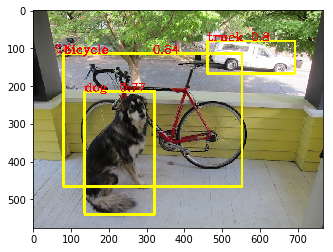

In [147]:
img3 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB) # convert the image in RGB format
plt.imshow(img3) # plot the image